In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
telco=pd.read_csv('C:/Users/User/Downloads/Churn.csv')
telco.head(10)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,...,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,...,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,...,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,...,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,...,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


In [4]:
telco.shape

(3333, 21)

In [5]:
telco.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [6]:
telco.Churn.value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [7]:
telco.groupby(['Churn']).mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


In [8]:
telco.groupby('State')['Churn'].value_counts()

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64

<AxesSubplot:xlabel='Intl_Mins', ylabel='Density'>

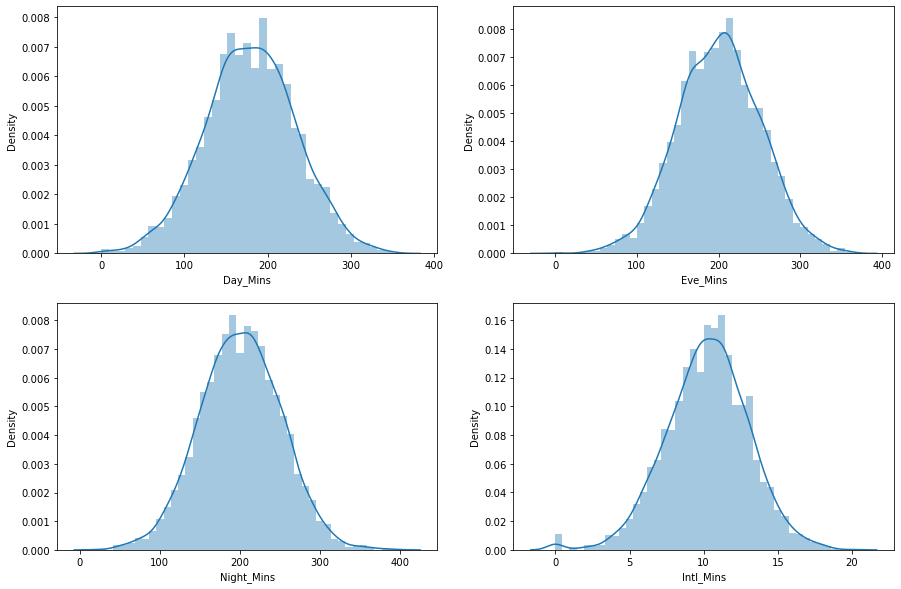

In [9]:
plt.subplots(figsize=(15,10))
ax1=plt.subplot(221)
# Visualize the distribution of 'Day_Mins'
sns.distplot(telco['Day_Mins'])

ax2=plt.subplot(222)
sns.distplot(telco['Eve_Mins'])

ax3=plt.subplot(223)
sns.distplot(telco['Night_Mins'])

ax4=plt.subplot(224)
sns.distplot(telco['Intl_Mins'])

We can see that all the above values are normally distributed. Therefore, we do not need to apply any feature transformations to the data in order to continue doing further operations on the data.

We have seen that there's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners.

We will visualize this difference using a box plot and incorporate other features of interest.

<AxesSubplot:xlabel='Churn', ylabel='CustServ_Calls'>

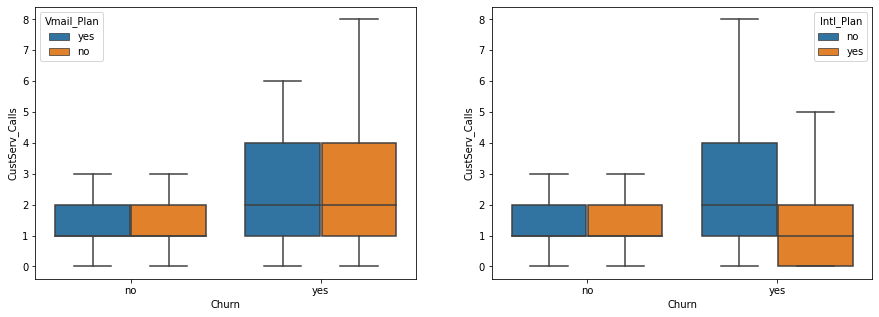

In [10]:
plt.subplots(figsize=(15,5))
ax1=plt.subplot(121)
sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = telco, sym = "", hue = "Vmail_Plan")
ax2=plt.subplot(122)
sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = telco, sym = "", hue = "Intl_Plan")

We can see that customers who churn have made more customer service calls. It is more so, when they dont have an international plan. If they do have an international plan however, then they leave fewer customer service calls.

### Modelling

In [11]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [12]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0,'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no':0,'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Intl_Plan'
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0,'yes':1})

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())
print(telco['Intl_Plan'].head())


0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64
0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64


In [13]:
# Drop the unnecessary features
telco = telco.drop(telco[['Area_Code','Phone']], axis=1)

# Verify dropped features
print(telco.columns)


Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')


We will create a new feature called average night calls which is equalt to Night_Mins/Night_Calls.

In [14]:
# Create the new feature
telco['Avg_Night_Calls'] = telco.Night_Mins/telco.Night_Calls

# Print the first five rows of 'Avg_Night_Calls'
print(telco.Avg_Night_Calls.head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


In [15]:
features=['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']

We will create two random customer values for testing out models.

In [16]:
#Giving random nos to two new fields for testing
customer1=telco[features].head(2).drop([1],axis=0)
customer1=pd.DataFrame.copy(customer1)
customer1['Account_Length']=91
customer1['Vmail_Message']=23
customer1['Day_Mins']=91
customer1['Eve_Mins']=186
customer1['CustServ_Calls']=25

customer2=telco[features].head(2).drop([0],axis=0)
customer2=pd.DataFrame.copy(customer2)
customer2['Account_Length']=85
customer2['Vmail_Message']=24
customer2['Day_Mins']=55
customer2['Eve_Mins']=184
customer2['CustServ_Calls']=2

### Logistic Regression Classifier

In [17]:
# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

LogisticRegression()

In [18]:
# Predict the label of new_customer
print(clf.predict(customer1))
print(clf.predict(customer2))

[1]
[0]


Therefore, from our logistic regression predictor we know that the customer 1 will churn while 2 will not.

### Decision Tree Classifier

In [19]:
# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features], telco.Churn)

DecisionTreeClassifier()

In [20]:
# Predict the label of new_customer
print(clf.predict(customer1))
print(clf.predict(customer2))

[0]
[0]


Therefore, again from our decision tree predictor we know that the customer 1 will churn while 2 will not.

### Random Forest Classifier

We will now split the data into test and train sets and check their accuracies. We will now use a random forest classifier to test the data.

In [21]:
cols=['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls',
       'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']

In [22]:
# Create feature variable
X = telco[cols].drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)

RandomForestClassifier()

### Metrics

In [24]:
# Compute accuracy
print(clf.score(X_test, y_test))

0.944


In [25]:
y_pred=clf.predict(X_test)

In [26]:
# Print the confusion matrix
print(confusion_matrix(y_test,y_pred))

[[837   6]
 [ 50 107]]


In [27]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
# Compute accuracy
print(clf.score(X_test, y_test))

0.9550224887556222


In [30]:
y_pred=clf.predict(X_test)

### Confusion Matrix

In [31]:
print(confusion_matrix(y_test,y_pred))

[[573   3]
 [ 27  64]]


### Precision and Recall Scores

In [32]:
print(precision_score(y_test,y_pred))

0.9552238805970149


In [33]:
# Print the recall
print(recall_score(y_test, y_pred))

0.7032967032967034


### ROC Curve

In [34]:
#from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

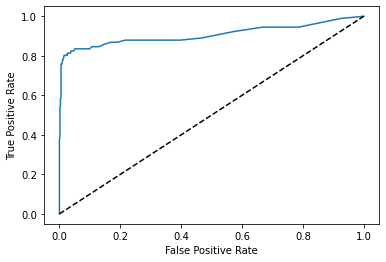

In [35]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [36]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9065552503052503


In [37]:
# Print the F1 score
print(f1_score(y_test,y_pred))

0.8101265822784811


### Feature Importances

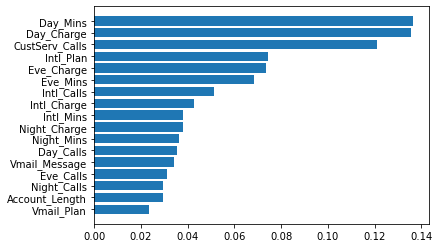

In [38]:
# Calculate feature importances
importances = clf.feature_importances_

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

We can see that Day_Mins, Day_Charge and CustServ_Calls have the higest importances while Vmail_Messge and Eve_Calls are have the least.